In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Task 1
df_energy = pd.read_excel('En_In.xlsx', skiprows=17, usecols='C:F', engine='openpyxl')
df_energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
df_energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [57]:
# Task 2

df_energy['Energy Supply'] = pd.to_numeric(df_energy['Energy Supply'], errors='coerce')
df_energy['Energy Supply'] = df_energy['Energy Supply'] * 1e6
df_energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


In [58]:
# Task 3

country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

df_energy['Country'] = df_energy['Country'].str.replace(r'\d+', '', regex=True).str.strip()
df_energy['Country'] = df_energy['Country'].replace(country_renames)
df_energy[df_energy['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82,0.000000
164,South Korea,1.100700e+10,221,2.279353
214,United Kingdom,7.920000e+09,124,10.600470
216,United States,9.083800e+10,286,11.570980


In [59]:
# Task 4
df_energy['Country'] = df_energy['Country'].str.replace(r'\(.*\)', '', regex=True).str.replace(r'\d+', '', regex=True).str.strip()
df_energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


In [60]:
# Task 5
gdp_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
# Reload the data using the 4th row as header (index 4)
df_gdp = pd.read_csv('gpd.csv', header=4)
df_gdp['Country Name'] = df_gdp['Country Name'].replace(gdp_renames)
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [61]:
# Task 6
df_scimago = pd.read_excel('scimagojr.xlsx')
df_scimago.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [62]:
# Task 7
df_scimago_top15 = df_scimago[df_scimago['Rank'] <= 15]
gdp_columns = ['Country Name'] + [str(year) for year in range(2006, 2016)]
df_gdp_filtered = df_gdp[gdp_columns]

df_merged = pd.merge(df_scimago_top15, df_energy, how='inner', left_on='Country', right_on='Country')
df_final = pd.merge(df_merged, df_gdp_filtered, how='inner', left_on='Country', right_on='Country Name')

df_final.set_index('Country', inplace=True)
df_final.drop(columns=['Country Name'], inplace=True)

final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
                 '% Renewable'] + [str(year) for year in range(2006, 2016)]

df_final = df_final[final_columns]
df_final

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [63]:
# Task 8
def average_gdp(df):
    gdp_columns = [str(year) for year in range(2006, 2015 + 1)]
    avg_gdp = df[gdp_columns].mean(axis=1)
    
    return avg_gdp.sort_values(ascending=False)

avg_gdp_series = average_gdp(df_final)
avg_gdp_series

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [64]:
# Task 9
def gdp_change_for_5th_highest(df):
    avg_gdp_series = average_gdp(df)
    fifth_highest_country = avg_gdp_series.index[4]  # 5th highest (index starts from 0)
    
    gdp_2015 = df.loc[fifth_highest_country, '2015']
    gdp_2006 = df.loc[fifth_highest_country, '2006']
    gdp_change = int(gdp_2015 - gdp_2006)
    
    return (fifth_highest_country, gdp_change)

gdp_change_tuple = gdp_change_for_5th_highest(df_final)
gdp_change_tuple

('France', 153345695364)

In [65]:
# Task 10

def country_with_max_renewable(df):
    max_renewable = float(df['% Renewable'].max())
    country = df['% Renewable'].idxmax()
    
    return (country, max_renewable)

max_renewable_tuple = country_with_max_renewable(df_final)
max_renewable_tuple

('Brazil', 69.64803)

In [66]:
# Task 11
def estimate_population(df):
    df['Population Estimate'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    sixth_country = df['Population Estimate'].sort_values(ascending=False).index[5]
    population = df.loc[sixth_country, 'Population Estimate']
    
    return (sixth_country, population)

sixth_population_tuple = estimate_population(df_final)
sixth_population_tuple

('Japan', 127409395.97315437)

In [67]:
# Task 12
def correlation_citations_vs_energy(df):
    df['Citations per Person'] = pd.to_numeric(df['Citations'], errors='coerce') / pd.to_numeric(df['Population Estimate'], errors='coerce')
    valid_data = df[['Citations per Person', 'Energy Supply per Capita']].apply(pd.to_numeric, errors='coerce').dropna()
    correlation = float(valid_data['Citations per Person'].corr(valid_data['Energy Supply per Capita']))
    
    return correlation

citations_energy_corr = correlation_citations_vs_energy(df_final)
citations_energy_corr

0.6668248468590926

In [68]:
# Task 13
def renewable_above_median(df):
    renewable_median = df['% Renewable'].median()
    df['Renewable Above Median'] = (df['% Renewable'] >= renewable_median).astype(int)
    return df['Renewable Above Median']

renewable_series = renewable_above_median(df_final)
renewable_series

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, dtype: int64

In [69]:
# Task 14
ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

def population_by_continent(df, continent_dict):
    df['Continent'] = df.index.map(continent_dict)
    population_stats = df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    return population_stats

continent_population_stats = population_by_continent(df_final, ContinentDict)
continent_population_stats

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


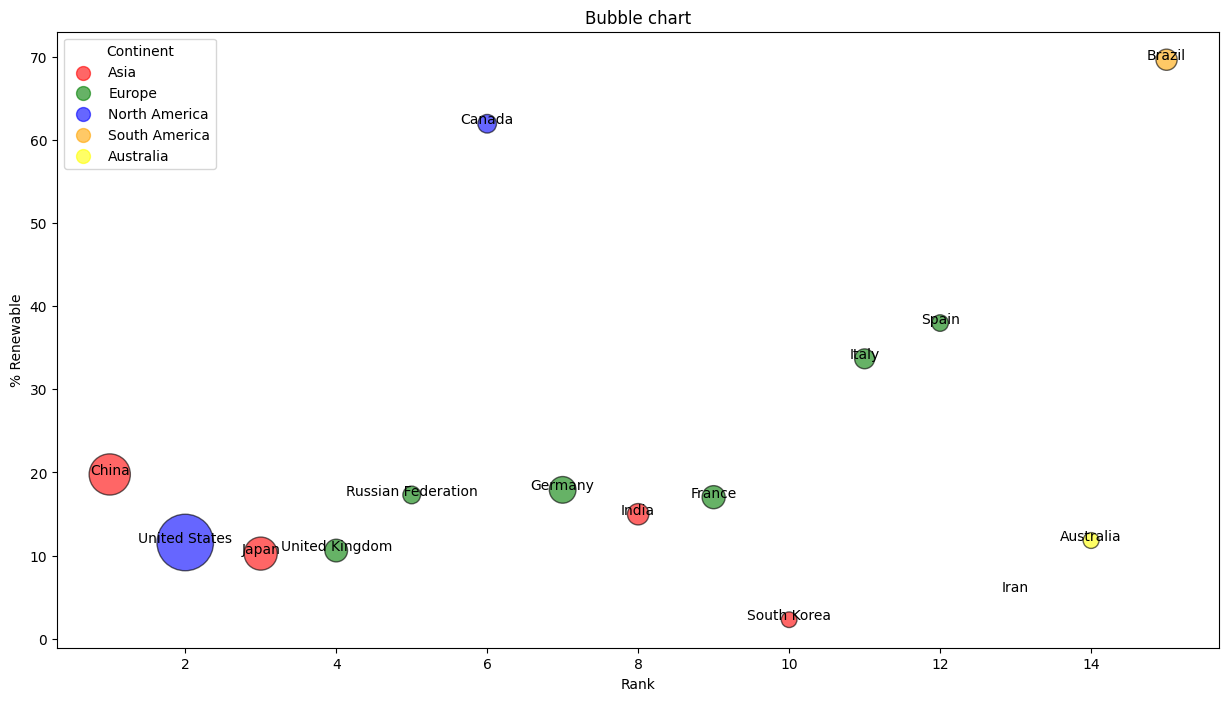

In [70]:
# Task 15
def bubble_chart_no_warning(df, continent_dict):
    df['Continent'] = df.index.map(continent_dict)
    
    continent_colors = {
        'Asia': 'red',
        'Europe': 'green',
        'North America': 'blue',
        'South America': 'orange',
        'Australia': 'yellow'
    }
    
    df['Color'] = df['Continent'].map(continent_colors)
    
    plt.figure(figsize=(15, 8))
    plt.scatter(df['Rank'], df['% Renewable'], s=df['2015'] / 1e10, c=df['Color'], alpha=0.6, edgecolors="black", linewidth=1)
    
    for i, country in enumerate(df.index):
        plt.text(df['Rank'].iloc[i], df['% Renewable'].iloc[i], country, fontsize=10, ha='center')
    
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('Bubble chart')
    
    for continent, color in continent_colors.items():
        plt.scatter([], [], c=color, alpha=0.6, s=100, label=continent)
    plt.legend(title='Continent', loc='best')
    
    plt.show()

bubble_chart_no_warning(df_final, ContinentDict)